In [1]:
from sklearn.manifold import TSNE
from pandas import DataFrame
#from tsnecuda import TSNE
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from time import time
%matplotlib inline

In [28]:
features = "RDA_feature_target.npy"
features = np.load(features)
print(features.shape)

target_file =  "/home/ubuntu/nas/projects/RDA/data/Office-31/webcam.txt"
with open(target_file, 'r') as f:
    file_dir, true_labels = [], []
    for i in f.read().splitlines():
        file_dir.append(i.split(' ')[0])
        true_labels.append(int(i.split(' ')[1]))
#print(true_labels)

(795, 1024)


In [29]:
#X = np.array([np.ones((1000)), np.zeros((1000)), np.full((1000), 2), np.full((1000), 3)])
Y = np.array(true_labels)
print(Y.shape)
X_embedded = TSNE(n_components=2).fit_transform(features)
print(X_embedded)
data = np.column_stack((X_embedded, Y))
print(data)
df = DataFrame(data, columns=['_DIM_1_','_DIM_2_','Label'])
df = df.astype({'Label': 'int'})
df.dtypes

(795,)
[[ 28.618979    -0.96954685]
 [ 27.590048    -0.617477  ]
 [ 28.784208    -0.85618764]
 ...
 [ 15.784914   -18.866919  ]
 [ 15.983036   -19.00017   ]
 [ 15.813891   -18.88806   ]]
[[ 28.6189785   -0.96954685   5.        ]
 [ 27.59004784  -0.617477     5.        ]
 [ 28.7842083   -0.85618764   5.        ]
 ...
 [ 15.78491402 -18.86691856   4.        ]
 [ 15.98303604 -19.00016975   4.        ]
 [ 15.81389141 -18.88805962   4.        ]]


_DIM_1_    float64
_DIM_2_    float64
Label        int64
dtype: object

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


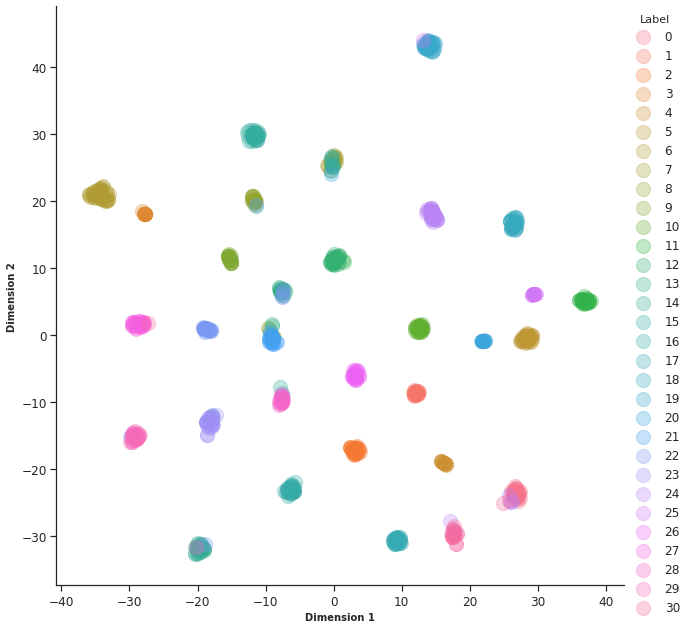

In [30]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

#plt.title('t-SNE Results: A2W', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')
plt.savefig("RDA_feature_target.pdf")